In [1]:
# general
import sys, os, path
import datetime

# nn related
import torch
import torch as th
import torch.nn as nn
import numpy as np
from numpy import linalg as la

# postprocessing
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib
from scipy.interpolate import griddata

import seaborn as sns
import tikzplotlib as tikz
from scipy import ndimage

# own scrips
sys.path.insert(1, '/home/leonriccius/PycharmProjects/data_driven_rans')

from scripts import preProcess
from scripts import TensorBasedNN
from scripts.TensorBasedNN import TBNN_generic
from scripts.utilities import *
from scripts.torchToFoam import writesymmtensor
from scripts.barymap import BarMap
from scripts import *

import csv
import pandas

In [2]:
path = '/home/leonriccius/Documents/Fluid_Data/tensordata/SquareDuct/2000'

b_dns = th.load(os.sep.join([path, 'b_dns-torch.th']))
b_rans = th.load(os.sep.join([path, 'b_rans-torch.th']))
grid = th.load(os.sep.join([path, 'grid-torch.th']))

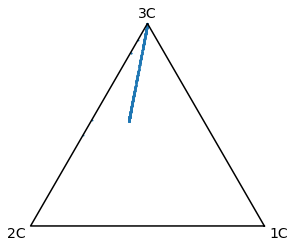

In [3]:
fig, ax = plt.subplots(figsize=(4, 3.5), constrained_layout=True)
ax.axis('equal')
ax.axis('off')

barm_rans = BarMap()
barm_rans.load_from_variable(b_rans, grid[:,1:3])
barm_rans.calculate_barycentric_coordinates()
barm_rans.plot_data_points(axis=ax, marker='o', s=.8)
barm_rans.plot_triangle(axis=ax)

ax.text(1.1, -0.0, '1C', fontsize=14,
        horizontalalignment='right', verticalalignment='top')
ax.text(-0.1, -0.0, '2C', fontsize=14,
        horizontalalignment='left', verticalalignment='top')
ax.text(0.50, 0.88, '3C', fontsize=14,
        horizontalalignment='center', verticalalignment='bottom')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/barycentric_map'
fig_name = 'squareDuctBarMap_2000_rans.pdf'
# plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')

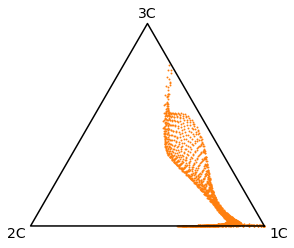

In [4]:
fig, ax = plt.subplots(figsize=(4, 3.5), constrained_layout=True)
ax.axis('equal')
ax.axis('off')

barm_dns = BarMap()
barm_dns.load_from_variable(b_dns, grid[:,1:3])
barm_dns.calculate_barycentric_coordinates()
barm_dns.plot_data_points(axis=ax, s=.8, color=sns.color_palette()[1])
barm_dns.plot_triangle(axis=ax)

ax.text(1.1, -0.0, '1C', fontsize=14,
        horizontalalignment='right', verticalalignment='top')
ax.text(-0.1, -0.0, '2C', fontsize=14,
        horizontalalignment='left', verticalalignment='top')
ax.text(0.50, 0.88, '3C', fontsize=14,
        horizontalalignment='center', verticalalignment='bottom')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/barycentric_map'
fig_name = 'squareDuctBarMap_2000_dns.pdf'
# plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')

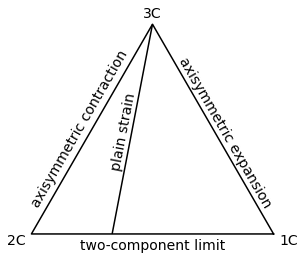

In [5]:
fig, ax = plt.subplots(figsize=(4, 3.5), constrained_layout=True)
ax.axis('equal')
ax.axis('off')

fs=14

barm_desc = BarMap()
# barm_rans.plot_data_points(axis=ax, s=.8, color=sns.color_palette()[1])
barm_desc.plot_triangle(axis=ax)

# plot plain strain line
ax.plot([1/3, 0.5], [0, np.sqrt(0.75)], c='black', solid_capstyle='butt')
ax.text(0.32, 0.27, 'plain strain', fontsize=fs, rotation=79)

# label for the edges
ax.text(0.2, 0.1, 'axisymmetric contraction', va='bottom', ha='center', fontsize=fs, rotation=60)
ax.text(0.8, 0.1, 'axisymmetric expansion', va='bottom', ha='center', fontsize=fs, rotation=-60)
ax.text(0.5, -0.02, 'two-component limit', va='top', ha='center', fontsize=fs)

# label for the vertices
ax.text(1.1, -0.0, '1C', fontsize=14,
        ha='right', va='top')
ax.text(-0.1, -0.0, '2C', fontsize=14,
        ha='left', va='top')
ax.text(0.50, 0.88, '3C', fontsize=14,
        ha='center', va='bottom')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/barycentric_map'
fig_name = 'barycentric_map_plain_strain.pdf'
# plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')

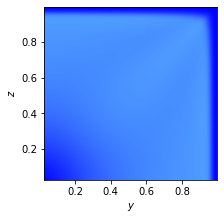

In [25]:
fig, ax = plt.subplots(figsize=(3,3), constrained_layout=True)
barm_rans.plot_on_geometry(ax)
ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$z$')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/barycentric_map'
fig_name = 'squareDuctBarMap_2000_rans_colors.pdf'
# plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')

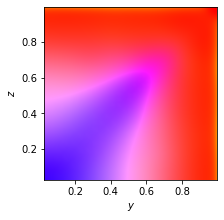

In [24]:
fig, ax = plt.subplots(figsize=(3,3), constrained_layout=True)
barm_dns.plot_on_geometry(ax)
ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$z$')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/barycentric_map'
fig_name = 'squareDuctBarMap_2000_dns_colors.pdf'
# plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')